In [16]:
from tensorflow import keras
from matplotlib import pyplot as plt

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [18]:


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [19]:


import numpy as np


num_samples = 1000
sequence_length = 50


X = np.zeros((num_samples, sequence_length, 1))
y = np.zeros((num_samples, sequence_length), dtype=np.int32)

for i in range(num_samples):
    freq = np.random.uniform(0.1, 0.5)
    phase = np.random.uniform(0, 2 * np.pi)
    t = np.linspace(0, 2 * np.pi, sequence_length)
    sin_wave = np.sin(freq * t + phase)
    
    X[i, :, 0] = sin_wave
    

    y[i] = np.digitize(sin_wave, bins=np.linspace(-1, 1, 10), right=True)



In [20]:
history = model.fit(X, y, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2706 - loss: 6.6818
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4863 - loss: 3.9355
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5138 - loss: 2.6134
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4807 - loss: 1.8665
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5032 - loss: 1.7285
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5440 - loss: 1.4123
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5609 - loss: 1.2869
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5662 - loss: 1.2482
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5949 - loss: 1.1723
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6276 - loss: 1.1333
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6677 - loss: 1.0284
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy:

In [21]:


history_dict = history.history



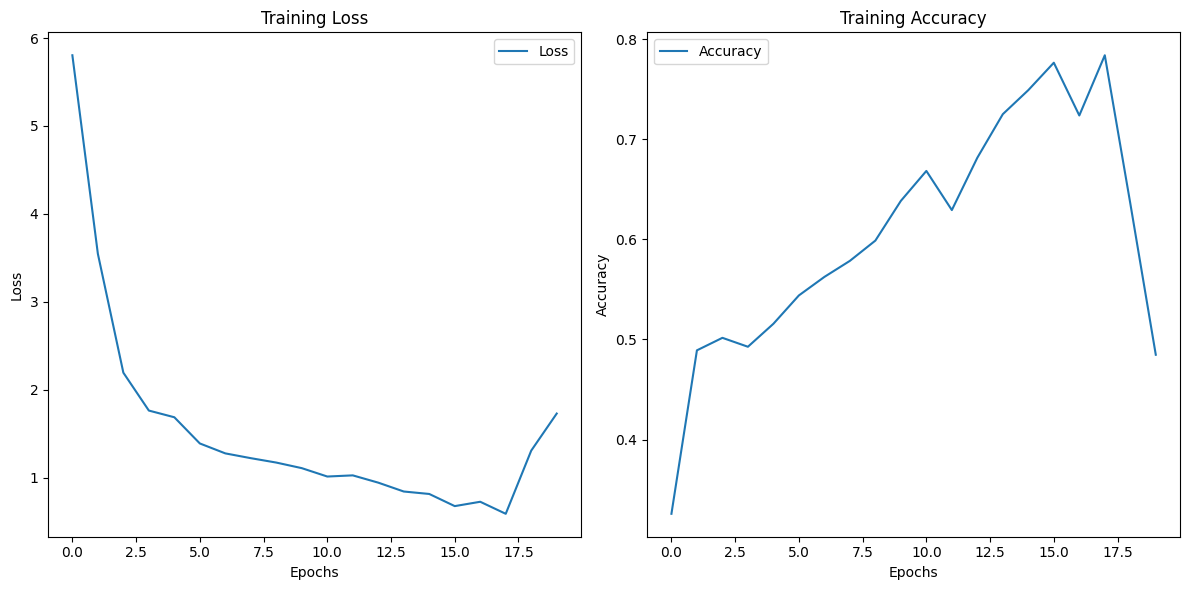

In [22]:


plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# LSTM

In [23]:


model = keras.models.Sequential([
        keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
])



In [24]:
model = keras.models.Sequential([
        keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True,
                         input_shape=[None, 1]),
        keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])

# GRU

In [25]:


model = keras.models.Sequential([
        keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                            input_shape=[None, 1]),
        keras.layers.GRU(20, return_sequences=True),
        keras.layers.GRU(20, return_sequences=True),
        keras.layers.LSTM(20, return_sequences=True),
        keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])

